In [1]:
import torch
import lightning as L
from torch.utils.data import TensorDataset,DataLoader
# custom modules
from word_embedding import WordEmbeddings,WordnPositionalEmbeddings ,WordnPositionalSelfAttentionEmbeddings
from utils import plot_token_relations , vectorize_text, get_weights

In [2]:
input_texts = ["Roads ? Where we're going we don't need roads","It's alive! It's alive!","May the Force be with you.","Life finds a way"]

In [3]:
eos_symbol = '<eos>'
input_texts = [input_text.lower() + f' {eos_symbol}' for input_text in input_texts]

In [4]:
vocabulary = []
for text in input_texts:
    vocabulary.extend(text.split(' '))
vocabulary = list(set(vocabulary))

In [5]:
vocabulary

['going',
 'the',
 'be',
 '<eos>',
 'a',
 "we're",
 'life',
 'finds',
 "it's",
 '?',
 'need',
 "don't",
 'with',
 'alive!',
 'force',
 'way',
 'roads',
 'we',
 'may',
 'you.',
 'where']

In [6]:
input_encodings = []
label_encodings = []
for text in input_texts:
    inputs,labels = vectorize_text(eos_symbol,text,vocabulary)
    input_encodings.extend(inputs)
    label_encodings.extend(labels)

In [7]:
len(input_encodings[0])


21

In [8]:
len(label_encodings[0])

21

In [9]:
inputs = torch.tensor(input_encodings)
labels = torch.tensor(label_encodings)
dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)

In [10]:
len(vocabulary)

21

In [11]:
word_embedding = WordEmbeddings(vocab_size=len(vocabulary),network_width=2)

Pre training parameters


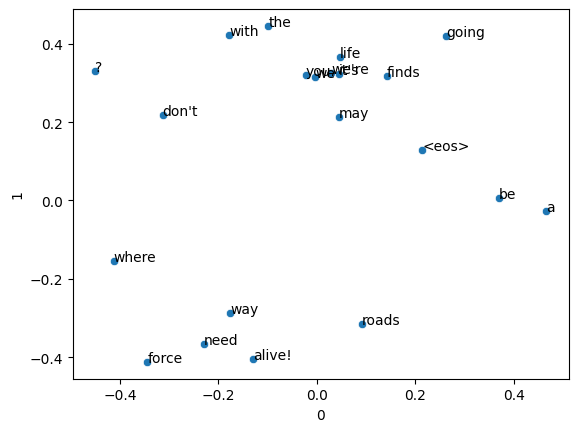

In [12]:
print('Pre training parameters')
plot_token_relations(word_embedding,vocabulary)

In [13]:
trainer = L.Trainer(max_epochs=150)
# trainer.fit(word_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Post training parameters


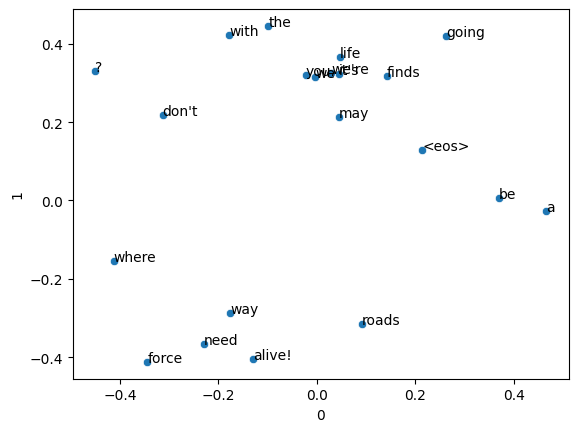

In [14]:
print('Post training parameters')
plot_token_relations(word_embedding,vocabulary)

In [15]:
weights_df = get_weights(word_embedding,vocabulary)

In [16]:
weights_df

,0,1,token
0,0.262647,0.420400,going
1,-0.098495,0.445672,the
2,0.370572,0.005958,be
3,0.213891,0.129581,<eos>
4,0.466071,-0.026322,a
5,0.029525,0.325090,we're
6,0.046983,0.367131,life
7,0.142064,0.318646,finds
8,0.045250,0.322514,it's
9,-0.449738,0.329615,?


# Positional encodings

In [17]:
word_n_positional_embedding = WordnPositionalEmbeddings(vocab_size=len(vocabulary),network_width=2)


In [18]:
trainer = L.Trainer(max_epochs=1)
trainer.fit(word_n_positional_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 84    
--------------------------------------------------
84        Trainable params
0         Non-trainable params
84        Total params
0.000     Total estimated model params size (MB)
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


Post training with positional encoding parameters


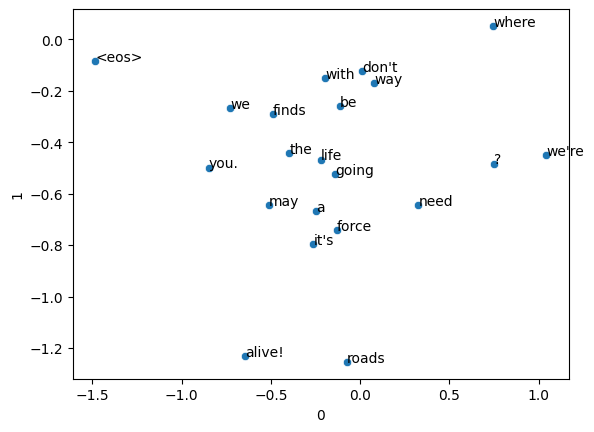

In [19]:
print('Post training with positional encoding parameters')
plot_token_relations(word_n_positional_embedding, vocabulary)

In [20]:
word_n_positional_embedding = WordnPositionalSelfAttentionEmbeddings(vocab_size=len(vocabulary),network_width=2)


In [21]:
trainer = L.Trainer(max_epochs=10)
trainer.fit(word_n_positional_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 210   
--------------------------------------------------
210       Trainable params
0         Non-trainable params
210       Total params
0.001     Total estimated model params size (MB)
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Post training with positional encoding parameters


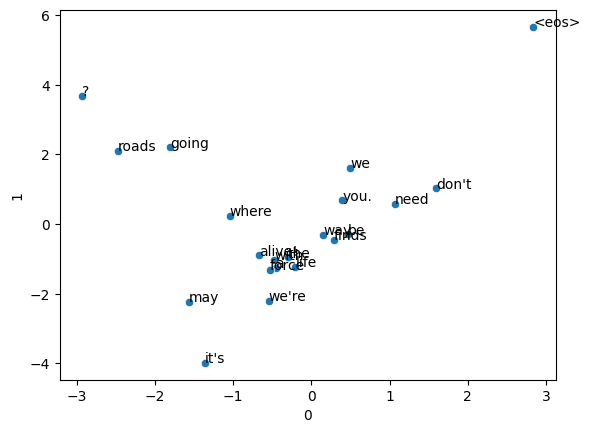

In [22]:
print('Post training with positional encoding parameters')
plot_token_relations(word_n_positional_embedding, vocabulary)

In [23]:
t = torch.tensor([])

In [24]:
torch.cat((t,torch.tensor(1)),0)

RuntimeError: zero-dimensional tensor (at position 1) cannot be concatenated